In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 

#Load Data

In [2]:
data = load_breast_cancer()
data_input = data.data
data_output = data.target

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
#data_input, data_output = load_breast_cancer(return_X_y=True)
x, x_test, y, y_test = train_test_split(data_input, data_output,test_size=0.2, random_state=10)
#if you want to see more details on the breast cancer data set, please check the following web site: 
#  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# add a validation set
x_train,x_val, y_train,y_val = train_test_split(x,y,test_size=0.2)

#Decision tree

In [5]:

model = DecisionTreeClassifier(random_state=4,max_depth=6,criterion='entropy')
#change the max of depth 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=4)

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

[Text(0.671875, 0.9285714285714286, 'X[22] <= 116.05\nentropy = 0.97\nsamples = 364\nvalue = [145, 219]'),
 Text(0.609375, 0.7857142857142857, 'X[27] <= 0.156\nentropy = 0.488\nsamples = 245\nvalue = [26, 219]'),
 Text(0.34375, 0.6428571428571429, 'X[1] <= 21.315\nentropy = 0.297\nsamples = 229\nvalue = [12, 217]'),
 Text(0.1875, 0.5, 'X[20] <= 17.81\nentropy = 0.085\nsamples = 187\nvalue = [2, 185]'),
 Text(0.125, 0.35714285714285715, 'X[10] <= 0.643\nentropy = 0.048\nsamples = 186\nvalue = [1, 185]'),
 Text(0.0625, 0.21428571428571427, 'entropy = 0.0\nsamples = 185\nvalue = [0, 185]'),
 Text(0.1875, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.35714285714285715, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5, 'X[23] <= 649.7\nentropy = 0.792\nsamples = 42\nvalue = [10, 32]'),
 Text(0.375, 0.35714285714285715, 'X[24] <= 0.172\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(0.3125, 0.21428571428571427, 'entropy = 0.0\nsamples

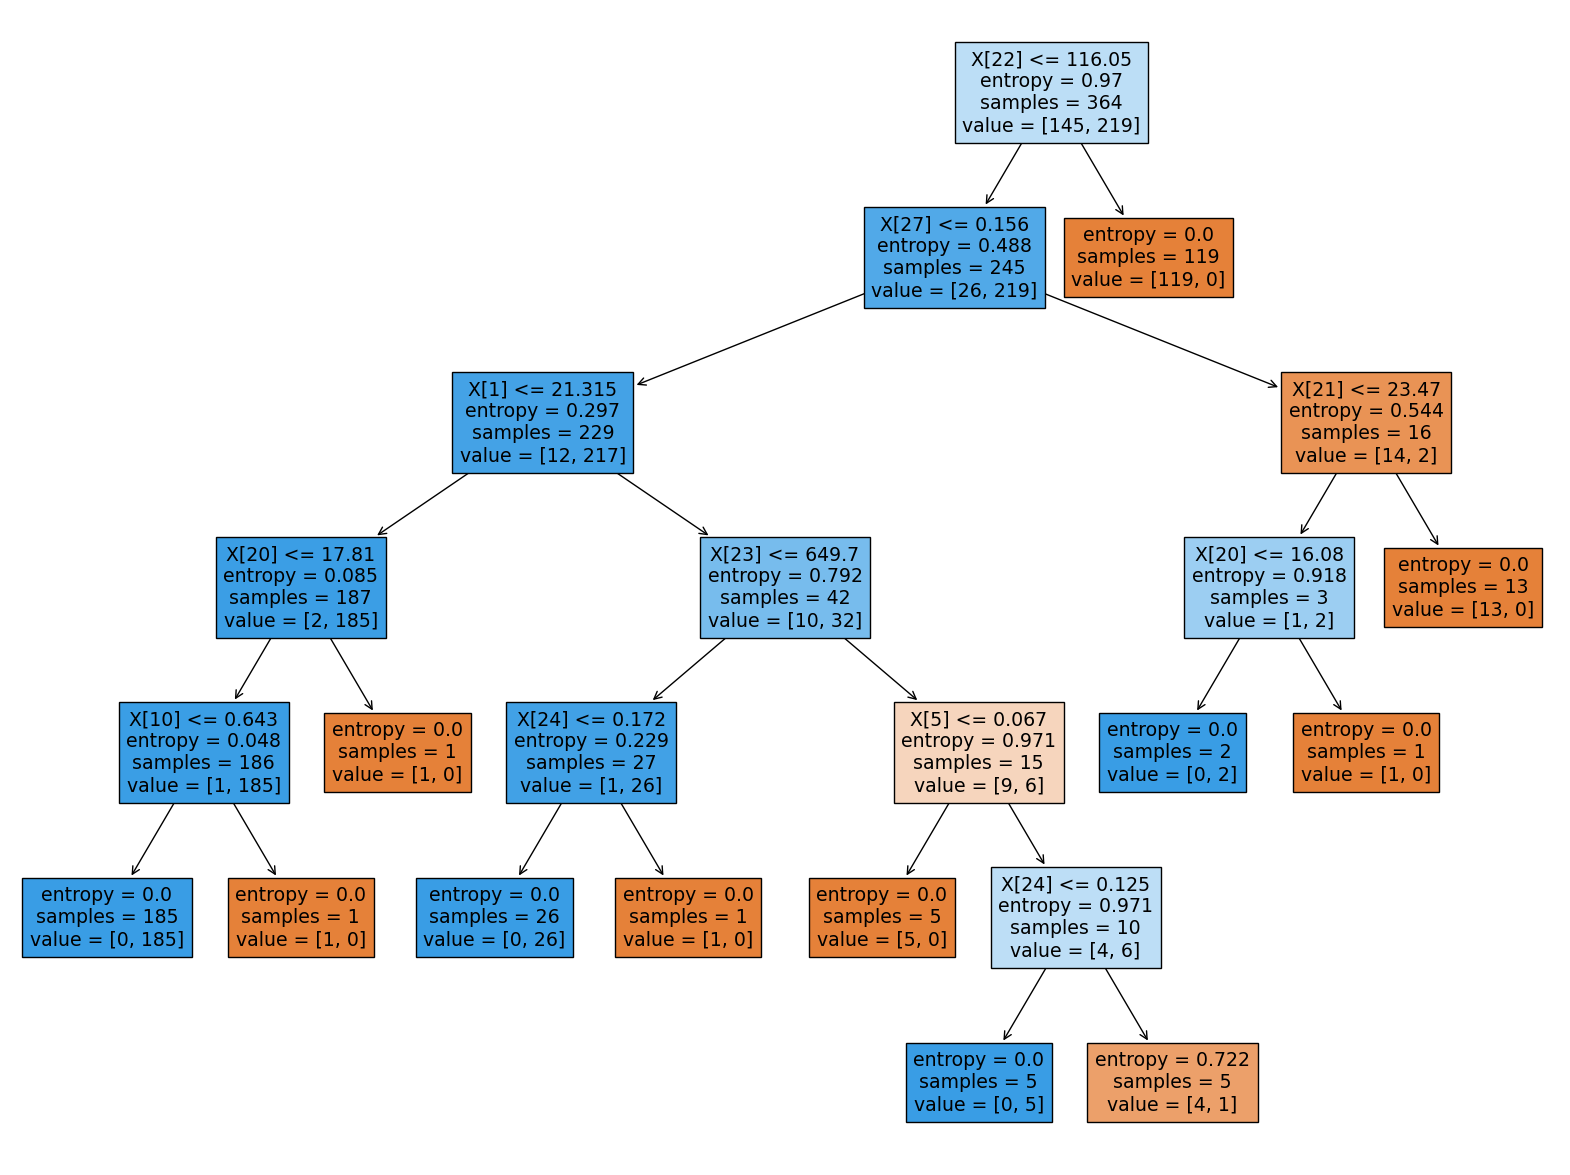

In [8]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True)

In [9]:
print(tree.export_text(model))

|--- feature_22 <= 116.05
|   |--- feature_27 <= 0.16
|   |   |--- feature_1 <= 21.32
|   |   |   |--- feature_20 <= 17.81
|   |   |   |   |--- feature_10 <= 0.64
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  0.64
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_20 >  17.81
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  21.32
|   |   |   |--- feature_23 <= 649.70
|   |   |   |   |--- feature_24 <= 0.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_24 >  0.17
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_23 >  649.70
|   |   |   |   |--- feature_5 <= 0.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.07
|   |   |   |   |   |--- feature_24 <= 0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_24 >  0.12
|   |   |   |   |   |   |--- class: 0
|   |--- feature_27 >  0.16
|   |   |--- feature_21 <= 23.47
|   |   |   |--- feature_20 <= 16.08
|   |   |   |   |--- class: 1
| 

In [10]:
y_predicted_val=model.predict(x_train)
print("The model accuracy on the Validation set : ",accuracy_score(y_train,y_predicted_val))

y_predicted = model.predict(x_test)
print("The model accuracy on the testing set : ",accuracy_score(y_test, y_predicted))


The model accuracy on the Validation set :  0.9972527472527473
The model accuracy on the testing set :  0.9385964912280702


In [11]:
#Let's modify the max depth  and check its impact on the accuracy

max_depth = [2,3,4,5,6,7]
training_acc_val = []
validation_acc_val = []
for max_depth_val in max_depth:
  model = DecisionTreeClassifier(random_state=2,max_depth = max_depth_val)
  model.fit(x_train,y_train)
  y_predicted_val=model.predict(x_train)
  y_predicted = model.predict(x_test)
  acc_val = accuracy_score(y_train,y_predicted_val)
  acc_test = accuracy_score(y_test, y_predicted)
  validation_acc_val.append(acc_val)
  training_acc_val.append(acc_test)


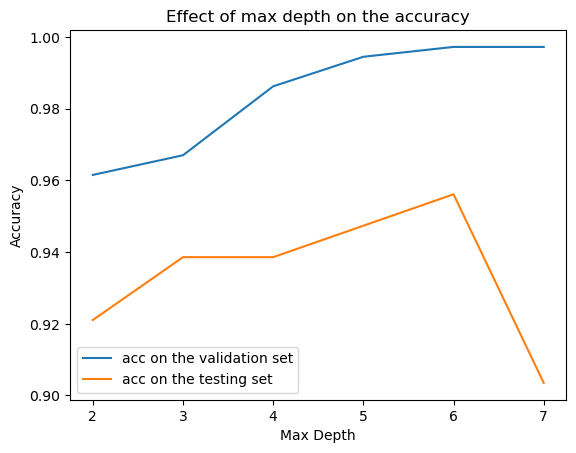

In [12]:
#Let's plot the accucary!
plt.plot(max_depth, validation_acc_val,label = 'acc on the validation set')
plt.plot(max_depth, training_acc_val,label = 'acc on the testing set')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max depth on the accuracy")
plt.show()

#Random forest

In [13]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9649122807017544
